![](https://carlos-mendez.org/project/python_esda/featured_hud6e0c467148e45bb03790018c3cab111_119535_720x0_resize_q75_lanczos.jpg)

# Setup

In [ ]:
# Adding necessary libraries to Google Colab environment

# Installing the 'contextily' library for adding basemaps to plots
!pip install contextily -q

# Installing the 'splot' library for spatial data visualization
!pip install splot -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 9.6 MB/s eta 0:00:00


In [ ]:
# Importing necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # Importing matplotlib image for image plotting
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

# Importing libraries for spatial data and visualization
import geopandas as gpd
import folium
from folium import Figure

import contextily as cx

import libpysal
from libpysal  import weights
from libpysal.weights import Queen

# Exploratory Spatial Data Analysis (ESDA) tools
import mapclassify as mc
import esda
from esda.moran import Moran, Moran_Local

# Spatial plotting tools
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_local_autocorrelation
from splot.libpysal import plot_spatial_weights
from splot.mapping import vba_choropleth

# Statistical modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Import data

In [ ]:
# Define the URL where the GeoJSON data is located
dataURL = 'https://github.com/quarcs-lab/project2021o-notebook/raw/main/map_and_data.geojson'

# Read the GeoJSON file from the specified URL using GeoPandas
# The resulting GeoDataFrame is assigned to the variable 'data'
data = gpd.read_file(dataURL)

In [ ]:
data.head(3)

,asdf_id,shapeName,COORD_X,COORD_Y,poly_id,mun,mun_id,dep,dep_id,dep_mun,shapeID,imds,rank_imds,population_2020,urbano_2012,sdg1_1_eepr,sdg1_1_ubn,sdg1_2_mpi,sdg1_4_abs,sdg2_2_cmc,sdg2_2_oww,sdg2_4_pual,sdg2_4_td,sdg3_1_idca,sdg3_2_imr,sdg3_2_mrc,sdg3_3_cdir,sdg3_3_di,sdg3_3_imr,sdg3_3_ti,sdg3_3_hivi,sdg3_7_afr,sdg4_1_ssdrm,sdg4_1_ssdrf,sdg4_4_phe,sdg4_6_lr,sdg4_c_qti,sdg4_c_qts,sdg5_1_gpsd,sdg5_1_gpyp,sdg5_1_gpmpi,sdg5_5_gpop,sdg6_1_dwc,sdg6_2_sc,sdg6_3_wwt,sdg7_1_ec,sdg7_1_rec,sdg7_1_cce,sdg7_3_co2epc,sdg8_4_rem,sdg8_5_oprm,sdg8_5_ofrm,sdg8_6_mlm,sdg8_6_wlm,sdg8_10_dbb,sdg8_11_idi,sdg9_1_routes,sdg9_5_cd,sdg9_5_eutf,sdg9_c_mnc,sdg9_c_drb,sdg10_2_gcye,sdg10_2_iec,sdg10_2_nssp,sdg11_1_hocr,sdg11_1_hno,sdg11_2_samt,sdg13_1_ccvi,sdg13_2_tco2e,sdg13_2_dra,sdg15_1_pa,sdg15_5_blr,sdg16_1_rhr,sdg16_6_pbec,sdg16_9_cr,sdg17_1_pmtax,sdg17_5_pipc,index_sdg1,index_sdg2,index_sdg3,index_sdg4,index_sdg5,index_sdg6,index_sdg7,index_sdg8,index_sdg9,index_sdg10,index_sdg11,index_sdg13,index_sdg15,index_sdg16,index_sdg17,pop2001,pop2002,pop2003,pop2004,pop2005,pop2006,pop2007,pop2008,pop2009,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019,pop2020,ln_NTLpc2012,ln_NTLpc2013,ln_NTLpc2014,ln_NTLpc2015,ln_NTLpc2016,ln_NTLpc2017,ln_NTLpc2018,ln_NTLpc2019,ln_NTLpc2020,ln_t400NTLpc2012,ln_t400NTLpc2013,ln_t400NTLpc2014,ln_t400NTLpc2015,ln_t400NTLpc2016,ln_t400NTLpc2017,ln_t400NTLpc2018,ln_t400NTLpc2019,ln_t400NTLpc2020,co2015,co2016,co2017,co2018,co2019,co2020,tr400_co2015,tr400_co2016,tr400_co2017,tr400_co2018,tr400_co2019,tr400_co2020,geometry
0,0,Esmeralda,-68.086369,-18.945744,178,Esmeralda,40505,Oruro,5,Oruro-Esmeralda,BOL-ADM3-33444609B20338026,53.200001,108,2854,0,None,78.300003,0.10,10.800000,19.200001,20.6,47.099998,0.0,43.200001,28.700001,34.700001,0,0,0,0,0,14,0,0,11.8,97.800003,40,53.599998,1,1,0.6,0.6,95.500000,15,0,82.400002,2,37,0.1,None,68.500000,43.900002,14.7,26.200001,0,0,1,0,None,52,0.4,0.28,None,8.100000,44.099998,87.699997,552.5,2,0.1,0,0,0,0,82.900002,86.699997,10.7,1082,34.759998,55.080002,85.690002,68.860001,58.529999,34.540001,52.230000,30.920000,24.530001,83.940002,32.560001,77.379997,50,82.400002,26.889999,962.03308,1051.7993,1148.5365,1242.4298,1364.5643,1486.7859,1625.0844,1772.2502,1946.8031,2044.5874,2275.4063,2564.9146,2820.8704,3077.3789,3359.6067,3707.0911,4065.6479,4454.5977,4886.9614,5354.1050,11.729473,12.111817,10.962022,11.699198,13.085610,13.647187,13.667681,13.595437,13.489282,11.414175,11.726494,12.039332,12.354541,12.671274,12.987050,13.300419,13.611585,13.921671,400.66104,402.31870,404.97272,406.84192,408.98264,410.99747,400.56021,402.63989,404.73074,406.83206,408.94409,411.06708,"MULTIPOLYGON (((-68.26703 -18.81616, -68.23937..."
1,1,Santuario de Quillacas,-66.813557,-19.318918,169,Quillacas,40202,Oruro,5,Oruro-Quillacas,BOL-ADM3-33444609B53994240,50.500000,171,4474,0,88.300003,73.599998,0.15,19.299999,31.500000,19.5,7.700000,87.0,41.000000,48.599998,64.599998,0,0,0,23,0,55,1,0,12.1,94.800003,33,25.000000,2,0,1.2,0.9,60.500000,25,0,64.599998,27,49,0.2,18.1,78.699997,67.400002,6.8,14.700000,0,0,2,3,18.200001,45,2.8,0.35,30,16.700001,22.400000,77.199997,0.0,2,0.2,0,0,0,0,53.700001,90.099998,0.0,443,27.950001,34.820000,70.199997,57.730000,87.529999,21.840000,50.110001,56.599998,46.639999,74.089996,30.680000,75.440002,50,69.720001,4.380000,3312.91750,3382.0591,3447.3469,3509.0361,3575.7029,3654.4546,3723.5171,3791.8071,3862.3999,3931.6042,4008.8794,4093.4082,4171.9414,4262.7119,4357.5601,4434.0586,4517.6450,4591.6426,4682.3174,4778.1196,12.965525,13.142761,13.074501,13.143079,12.948340,13.821883,13.822321,13.803769,14.016370,12.862933,12.999367,13.136051,13.273612,13.412519,13.552914,13.693778,13.834767,13.975857,398.69547,402.18451,404.49866,406.64880,408.32587,410.74161,399.42441,401.71268,404.01230,406.32236,408.64389,410.97791,"MULTIPOLYGON (((-66.50208 -19.3599, -66.56355 ..."
2,2,Pampa Aullagas,-67.165981,-19.231799,185,Pampa Aullagas,40802,Oruro,5,Oruro-Pampa Aullagas,BOL

In [ ]:
dataDefinitions = pd.read_csv('https://raw.githubusercontent.com/quarcs-lab/project2021o-notebook/main/dataDefinitions.csv')
dataDefinitions

,Variable,Label
0,poly_id,Polygon ID
1,asdf_id,ASDF ID
2,mun,Municipality
3,mun_id,Municipality ID
4,dep,Department
...,...,...
134,tr400_co2016,Trend estimated carbon dioxide in 2016
135,tr400_co2017,Trend estimated carbon dioxide in 2017
136,tr400_co2018,Trend estimated carbon dioxide in 2018
137,tr400_co2019,Trend estimated carbon dioxide in 2019


In [ ]:
data_dict = dict(zip(dataDefinitions['Variable'], dataDefinitions['Label']))

In [ ]:
gdf = data[['mun', 'rank_imds', 'imds', 'geometry']]
gdf

,mun,rank_imds,imds,geometry
0,Esmeralda,108,53.200001,"MULTIPOLYGON (((-68.26703 -18.81616, -68.23937..."
1,Quillacas,171,50.500000,"MULTIPOLYGON (((-66.50208 -19.3599, -66.56355 ..."
2,Pampa Aullagas,246,47.299999,"MULTIPOLYGON (((-67.01372 -19.1954, -67.0152 -..."
3,Llallagua,44,58.099998,"MULTIPOLYGON (((-66.41646 -18.25904, -66.40417..."
4,Caripuyo,299,43.500000,"MULTIPOLYGON (((-66.41646 -18.25904, -66.45838..."
...,...,...,...,...
334,Pasorapa,60,56.799999,"MULTIPOLYGON (((-64.81591 -18.48926, -64.8131 ..."
335,Cotagaita,233,47.599998,"MULTIPOLYGON (((-66.20137 -20.62814, -66.19258..."
336,Camargo,115,53.000000,"MULTIPOLYGON (((-65.22177 -20.31382, -65.12751..."
337,Villazón,21,62.000000,"MULTIPOLYGON (((-65.3907 -21.84673, -65.3967 -..."


# Plot map

In [ ]:
# Visualize spatial data using the explore() method of a GeoDataFrame
gdf.explore(
    # Specify the column to visualize on the map
    column='imds',
    # Specify the attributes to display in the tooltip when hovering over map features
    tooltip=['mun', 'imds', 'rank_imds'],
    # Choose the classification scheme for data visualization
    scheme='fisherjenks',
    # Specify the number of classes for classification
    k=3,
    # Choose the colormap for data visualization
    cmap='coolwarm',
    # Specify whether to display a legend
    legend=True,
    # Choose the basemap tiles provider
    tiles='CartoDB positron',
    # Customize the style of the basemap tiles
    style_kwds=dict(color="gray", weight=0.5),
    # Customize the appearance of the legend
    legend_kwds=dict(colorbar=False)
)

# Spatial weights and lags

In [ ]:
# Create K-nearest neighbors (KNN) spatial weights from the GeoDataFrame gdf
# k=6 specifies the number of nearest neighbors to consider for each observation
W = weights.KNN.from_dataframe(gdf, k=6)

# Transform the spatial weights to row-standardized form
W.transform = 'r'

In [ ]:
# Reproject to use contextily
gdf = gdf.to_crs(epsg=3857)

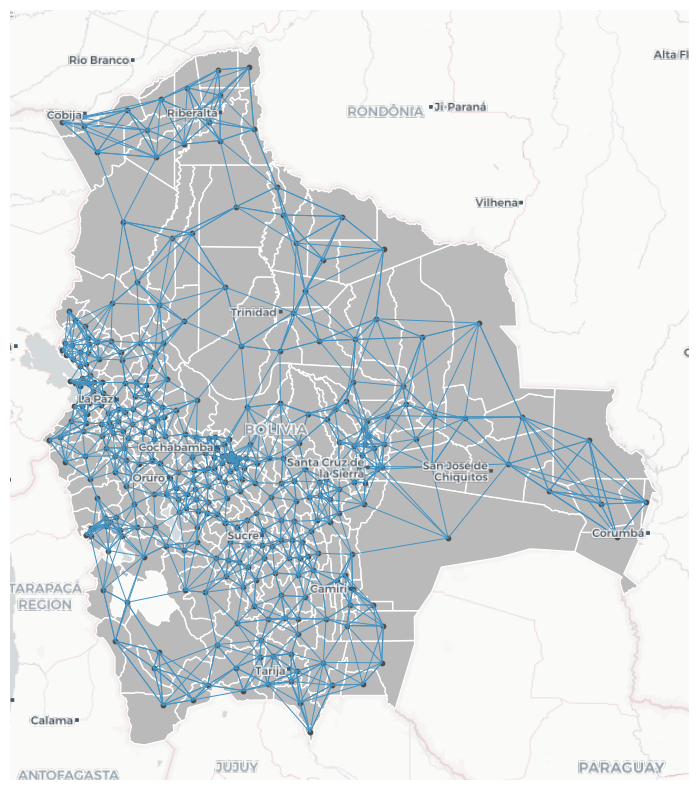

In [ ]:
# Plot the spatial weights using splot library
# This will visualize the spatial relationships between observations defined by the weights matrix W
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14,10))
plot_spatial_weights(W, gdf, ax=ax)
cx.add_basemap(ax, crs=gdf.crs.to_string(), source = cx.providers.CartoDB.Positron,           attribution=False)
cx.add_basemap(ax, crs=gdf.crs.to_string(), source = cx.providers.CartoDB.PositronOnlyLabels, attribution=False)
plt.show()

In [ ]:
# Calculate spatial lag of INDICATOR1 using the specified weights
gdf['Wimds'] = weights.lag_spatial(W, gdf['imds'])

In [ ]:
data_dict.update({'Wimds': 'Development index in neighboring municipalities'})

In [ ]:
gdf[['mun', 'imds', 'Wimds']]

,mun,imds,Wimds
0,Esmeralda,53.200001,49.950000
1,Quillacas,50.500000,48.616666
2,Pampa Aullagas,47.299999,49.850000
3,Llallagua,58.099998,48.500000
4,Caripuyo,43.500000,48.133333
...,...,...,...
334,Pasorapa,56.799999,52.533333
335,Cotagaita,47.599998,51.566666
336,Camargo,53.000000,45.116665
337,Villazón,62.000000,50.850000


# Global spatial dependence

In [ ]:
# Create a scatter plot using Plotly Express
px.scatter(
    gdf,
    x='imds',                               # Data for the x-axis
    y='Wimds',                              # Data for the y-axis
    hover_name='mun',                       # Display municipality name in hover tooltip
    hover_data=['mun', 'imds', 'Wimds'],    # Additional data to display in hover tooltip
    trendline="ols",                        # Add an ordinary least squares (OLS) trendline
    marginal_x="box",                       # Display marginal box plot on the x-axis
    marginal_y="box",                       # Display marginal box plot on the y-axis
    labels=dict(data_dict)                  # Customize axis labels using data_dict
)

In [ ]:
# Compute Global Moran's I statistic for the 'imds' variable using the spatial weights matrix W
globalMoran = Moran(gdf['imds'], W)

# Format Moran's I statistic to two decimal places
moranI = "{:.2f}".format(globalMoran.I)

# Print Moran's I statistic
moranI

'0.39'

In [ ]:
print(globalMoran.p_sim)

0.001


# Local spatial dependence

In [ ]:
# Read GeoJSON file from GitHub using GeoPandas
# gdf2 is assigned the GeoDataFrame containing the data from the provided URL
gdf2 = gpd.read_file('https://github.com/wmgeolab/geoBoundaries/raw/905b0ba/releaseData/gbOpen/BOL/ADM1/geoBoundaries-BOL-ADM1_simplified.geojson')

# Reproject gdf2 to match the coordinate reference system (CRS) of gdf
gdf2 = gdf2.to_crs(gdf.crs)

# Calculate representative points for each geometry in gdf2
# 'coords' column is added to gdf2, containing the coordinates of the representative points
gdf2['coords'] = gdf2['geometry'].apply(lambda x: x.representative_point().coords[:])

# Extract the coordinates from the representative points and assign them to the 'coords' column
gdf2['coords'] = [coords[0] for coords in gdf2['coords']]

In [ ]:
# Calculate Local Moran's I statistics
# gdf['imds'] is the variable for which local spatial autocorrelation is computed
# W is the spatial weights matrix defining the spatial relationships between observations
# permutations specifies the number of random permutations for statistical inference
# seed sets the seed for reproducibility of random permutations
moranLocal = Moran_Local(gdf['imds'], W, permutations=999, seed=12345)

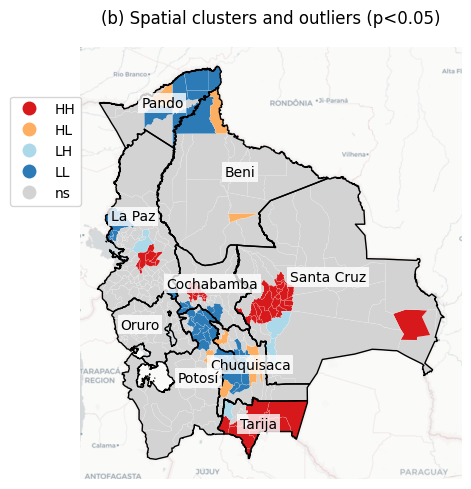

In [ ]:
# Adjust the aspect ratio for better readability
# Create a subplot with one plot
f, ax = plt.subplots(1, figsize=(7, 5))

# Plot Local Indicators of Spatial Association (LISA) clusters
# moranLocal is a Moran_Local object containing local Moran statistics
# gdf is a GeoDataFrame containing spatial data
# p is the significance level for identifying clusters
# legend_kwds is a dictionary containing keyword arguments for the legend
lisa_cluster(moranLocal, gdf, p=0.05, legend_kwds={'bbox_to_anchor':(0.02, 0.90)}, ax=ax)

# Plot the GeoDataFrame gdf2 with only the border (no filled polygons)
gdf2.plot(facecolor='none', edgecolor='black', ax=ax)

# Annotate the plot with text labels for each geometry in gdf2
# Text labels are placed at the coordinates of each geometry
texts =[ax.text(row.coords[0], row.coords[1], s=row['shapeName'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}) for idx, row in gdf2.iterrows()]

# Add a basemap to the plot using the contextily package
# crs is the coordinate reference system of gdf
# source specifies the basemap provider (CartoDB.Voyager/CartoDB.Positron)
# attribution=False removes the attribution from the basemap
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Positron, attribution=False)

# Add a title to the plot for context
ax.set_title("(b) Spatial clusters and outliers (p<0.05)")

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

# Save the plot as an image file with high DPI and tight bounding box
plt.savefig("lisaMAP.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
# Add local Moran's I p-values to the GeoDataFrame
gdf['lisa'] = moranLocal.p_sim

# Classify and assign cluster types based on significance levels
# If p-value is less than 0.05, assign cluster type based on quadrant (q)
gdf.loc[moranLocal.p_sim < 0.05, 'cluster'] = moranLocal.q[moranLocal.p_sim < 0.05]

# Fill NaN values with 0 (for non-significant observations)
gdf["cluster"] = gdf["cluster"].fillna(0)

# Map cluster codes to descriptive labels
gdf["cluster"] = gdf["cluster"].map({
    0: "Not significant",   # No significant spatial autocorrelation
    1: "High-high",         # High value surrounded by high values (hotspot)
    2: "Low-high",          # Low value surrounded by high values
    3: "Low-low",           # Low value surrounded by low values (coldspot)
    4: "High-low",          # High value surrounded by low values
})

In [ ]:
gdf = gdf.sort_values(by='cluster')
gdf

,mun,rank_imds,imds,geometry,Wimds,lisa,cluster
169,Coroico,36,58.799999,"MULTIPOLYGON (((-7548906.153 -1845351.107, -75...",60.499999,0.001,High-high
124,Cliza,27,60.500000,"MULTIPOLYGON (((-7334544.546 -1989004.58, -733...",55.916667,0.027,High-high
121,Toko,125,52.700001,"MULTIPOLYGON (((-7334507.527 -1991275.391, -73...",56.733333,0.014,High-high
96,Caraparí,18,63.000000,"MULTIPOLYGON (((-7090890.059 -2439123.451, -70...",62.349999,0.001,High-high
95,Yunchará,145,51.799999,"MULTIPOLYGON (((-7234089.326 -2485520.023, -72...",57.583333,0.010,High-high
...,...,...,...,...,...,...,...
158,Palca,205,49.099998,"MULTIPOLYGON (((-7536456.151 -1903380.067, -75...",53.966666,0.132,Not significant
19,Huayllamarca,241,47.500000,"MULTIPOLYGON (((-7556756.875 -2014765.219, -75...",49.399999,0.295,Not significant
18,Oruro,9,67.400002,"MULTIPOLYGON (((-7461445.855 -2043592.929, -74...",51.600000,0.374,Not significant
129,Pari-Paria-Soracachi,207,48.900002,"MULTIPOLYGON (((-7440753.673 -2043599.637, -74...",50.383334,0.438,Not significant


In [ ]:
gdf['cluster'].unique()

array(['High-high', 'High-low', 'Low-high', 'Low-low', 'Not significant'],
      dtype=object)

In [ ]:
# Visualize spatial data using the explore() method of a GeoDataFrame
gdf.explore(
    column='cluster',                              # Specify the column for visualization
    tooltip=['mun', 'rank_imds', 'cluster', 'lisa', 'imds', 'Wimds'],  # Specify attributes for tooltip
    cmap=["#c23429", "#efb16e",  "#b5d8e7",  "#4679b1",  "#d3d3d3"],  # Define color map for clusters #c23429 (Red) #4679b1 (Blue), #b5d8e7 (Light blue), #efb16e(Orange), #d3d3d3 (Light grey)
    legend=True,                                   # Display legend
    tiles='CartoDB positron',                      # Choose basemap tiles provider
    style_kwds=dict(color="gray", weight=0.5),     # Customize the color and lines of boundaries
    legend_kwds=dict(colorbar=False)               # Customize legend appearance
)

In [ ]:
# Create a scatter plot using Plotly Express
fig = px.scatter(
    gdf,
    x='imds',                               # Data for the x-axis
    y='Wimds',                              # Data for the y-axis
    color='cluster',                        # Color points by cluster type
    color_discrete_sequence=["#c23429", "#efb16e", "#b5d8e7", "#4679b1", "#d3d3d3"],  # Define color sequence for clusters
    hover_name='mun',                       # Display municipality name in hover tooltip
    hover_data=['mun', 'cluster', 'imds', 'Wimds', 'lisa'],  # Additional data for hover tooltip
    trendline="ols",                        # Add an ordinary least squares (OLS) trendline
    trendline_scope='overall',              # Fit a single trendline for all data points
    labels=dict(data_dict)                  # Customize axis labels using data_dict
)

# Set the color of the trendline to black
fig.update_traces(line=dict(color='black'))

# Set the range for x-axis and y-axis
x_range = [min(gdf['imds']), max(gdf['imds'])]
y_range = [min(gdf['Wimds']), max(gdf['Wimds'])]
fig.update_xaxes(range=x_range)
fig.update_yaxes(range=y_range)

# Add horizontal and vertical lines at the average values
average_imds_value = gdf['imds'].mean()
average_wimds_value = gdf['Wimds'].mean()

fig.add_shape(
    type="line",
    x0=average_imds_value,
    y0=y_range[0],
    x1=average_imds_value,
    y1=y_range[1],
    line=dict(color="grey", width=1, dash="dash")
)

fig.add_shape(
    type="line",
    x0=x_range[0],
    y0=average_wimds_value,
    x1=x_range[1],
    y1=average_wimds_value,
    line=dict(color="grey", width=1, dash="dash")
)

# Update layout to set plot background color to white
fig.update_layout(plot_bgcolor='#f9f9f7')

# Display the updated figure
fig.show()

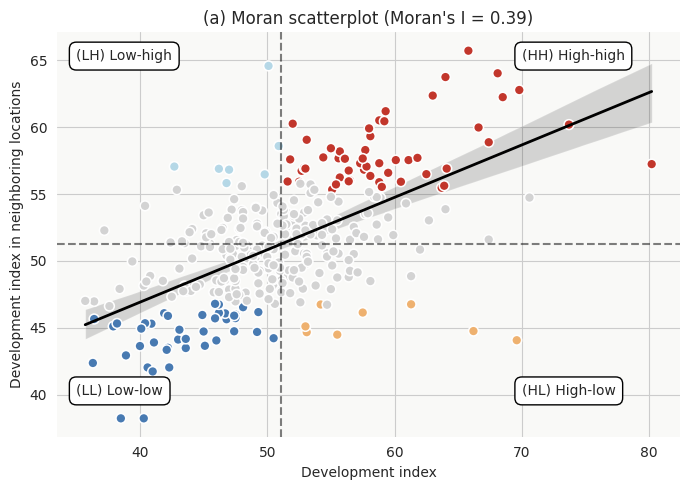

In [ ]:
# Set Seaborn theme to white grid for cleaner appearance
sns.set_style('whitegrid')

# Adjust the aspect ratio for better readability
f, ax = plt.subplots(1, figsize=(7, 5))

# Add the regression line with all grey points
sns.regplot(
    x='imds',
    y='Wimds',
    data=gdf,
    scatter=True,
    marker='.',
    color='#d3d3d3',                    # Light gray for points
    line_kws={'linewidth': 2, 'color': 'black'}  # Black for regression line
)

# Overlay the significant points
sns.scatterplot(
    x='imds',
    y="Wimds",
    hue="cluster",
    palette= ["#c23429", "#efb16e",  "#b5d8e7",  "#4679b1",  "#d3d3d3"],  # #c23429 (Red) #4679b1 (Blue), #b5d8e7 (Light blue), #efb16e(Orange), #d3d3d3 (Light grey)
    data=gdf,
    marker=".",
    s=200,  # Increase the marker size here
    alpha=0.99,  # No need for scatter_kws here
    legend=False  # Add this line to remove the legend
)

# Remove spines for a cleaner look
sns.despine(top=True, bottom=True, left=True, right=True)

# Add reference lines (average values)
plt.axvline(gdf['imds'].mean(), c='black', alpha=0.5, linestyle='--')
plt.axhline(gdf['Wimds'].mean(), c='black', alpha=0.5, linestyle='--')

# Annotate quadrants directly for clarity
ax.annotate('(HH) High-high', xy=(70, 65), xytext=(70, 65), fontsize=10,
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black', lw=1))
ax.annotate('(HL) High-low', xy=(70, 40), xytext=(70, 40), fontsize=10,
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black', lw=1))
ax.annotate('(LH) Low-high', xy=(35, 65), xytext=(35, 65), fontsize=10,
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black', lw=1))
ax.annotate('(LL) Low-low', xy=(35, 40), xytext=(35, 40), fontsize=10,
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black', lw=1))

# Add a title for context
ax.set_title(f"(a) Moran scatterplot (Moran's I = {moranI})")

# Create more informative labels
ax.set_xlabel('Development index')                 # Replace with the actual variable name
ax.set_ylabel('Development index in neighboring locations')   # Replace if applicable

# Set background color for the plot
ax.set_facecolor('#f9f9f7')

# Save and show the plot
plt.tight_layout()
plt.savefig('lisaSC.png', dpi=300, bbox_inches='tight')
plt.show()

# Combined figures

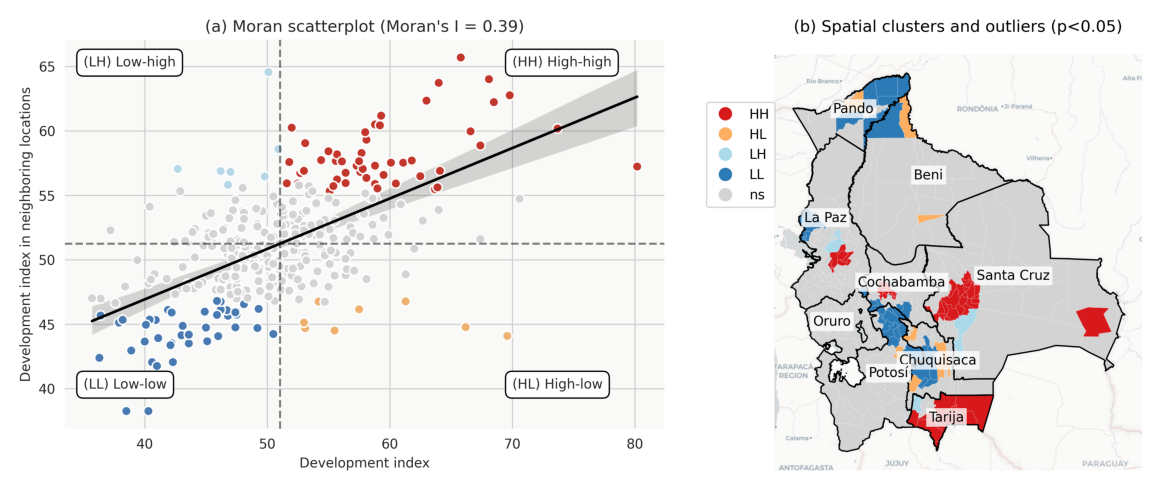

In [ ]:
# Combine figures

# Read the two PNG files
image1 = mpimg.imread('lisaSC.png')
image2 = mpimg.imread('lisaMAP.png')

# Create a figure and a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Display the first image in the first subplot
ax1.imshow(image1)
ax1.axis('off')  # Turn off axis for cleaner appearance

# Display the second image in the second subplot
ax2.imshow(image2)
ax2.axis('off')  # Turn off axis for cleaner appearance

# Adjust the horizontal spacing between subplots
plt.subplots_adjust(wspace=-0.4)

# Save and show the combined figure
plt.tight_layout()  # Ensure tight layout
plt.savefig('lisa.png', dpi=300, bbox_inches='tight')  # Save the figure as PNG
plt.show()  # Display the combined figure